In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt

from scipy.stats import norm

In [2]:
%load_ext autoreload
%autoreload 2
from negbin_val_functions import *

In [3]:
labels = ["islam", "gse5\n2i", "gse5\nserum", "celseq2\ncs1_man", "celseq2\ncs2_man",
          "celseq2\ncs2_c1", "zeisel*", "paul*"]
flat_labels = ["islam", "gse5 2i", "gse5 serum", "celseq2 cs1_man", "celseq2 cs2_man",
               "celseq2 cs2_c1", "zeisel*", "paul*"]
zeisel_labels = ['Astro1', 'Astro2', 'CA1Pyr1', 'CA1Pyr2', 'CA1PyrInt', 'CA2Pyr2',
       'Choroid', 'ClauPyr', 'Epend', 'Int1', 'Int2', 'Int3', 'Int4', 'Int5',
       'Int6', 'Int7', 'Int8', 'Int9', 'Int10', 'Int11', 'Int12',
       'Int13', 'Int14', 'Int15', 'Int16', 'Mgl1', 'Mgl2', 'Oligo1', 'Oligo2',
       'Oligo3', 'Oligo4', 'Oligo5', 'Oligo6', 'Peric', 'Pvm1', 'Pvm2',
       'S1PyrDL', 'S1PyrL23', 'S1PyrL4', 'S1PyrL5', 'S1PyrL5a', 'S1PyrL6',
       'S1PyrL6b', 'SubPyr', 'Vend1', 'Vend2', 'Vsmc']
celseq_labels = ["cs1_man", "cs2_man", "cs2_c1"]
gse5_labels = ["cells2i", "serum"]
islam_labels = ["islam"]

all_labels = islam_labels + gse5_labels + celseq_labels + zeisel_labels
all_datasets = len(all_labels)

read and plot $\chi^2$  goodness of fit test $p$-values for the different datasets

In [4]:
delta_bic = np.zeros((all_datasets, 3))
total_genes = np.zeros((all_datasets, 3))
delta_bic[0], total_genes[0] = read_all("islam", "islam")
delta_bic[1], total_genes[1] = read_all("gse5", "cells2i")
delta_bic[2], total_genes[2] = read_all("gse5", "serum")
delta_bic[3], total_genes[3] = read_all("celseq2", "cs1_man")
delta_bic[4], total_genes[4] = read_all("celseq2", "cs2_man")
delta_bic[5], total_genes[5] = read_all("celseq2", "cs2_c1")

for i in range(len(zeisel_labels)):
    delta_bic[6 + i], total_genes[6 + i] = read_all("zeisel", zeisel_labels[i])

Different functions were fitted to the count distribution in cells and controls. The goodness of fit was assessed by a $\chi^2$ test. The bar plot shows the number of genes for which a given distribution was not rejected ($\chi^2$ $p$-value > 0.01)

In [5]:
N = 7
x = np.arange(N)
normals = np.zeros(N)
poisson = np.zeros(N)
negbins = np.zeros(N)

negbins[0:6] = delta_bic[0:6, 0] / total_genes[0:6, 0]
poisson[0:6] = delta_bic[0:6, 1] / total_genes[0:6, 1]
normals[0:6] = delta_bic[0:6, 2] / total_genes[0:6, 2]

zeisel_start = 6
zeisel_end = 6 + len(zeisel_labels)
negbs = delta_bic[zeisel_start:zeisel_end, 0] / total_genes[zeisel_start:zeisel_end, 0]
poiss = delta_bic[zeisel_start:zeisel_end, 1] / total_genes[zeisel_start:zeisel_end, 1]
norms = delta_bic[zeisel_start:zeisel_end, 2] / total_genes[zeisel_start:zeisel_end, 2]
normals[6] = np.mean(norms)
poisson[6] = np.mean(poiss)
negbins[6] = np.mean(negbs)

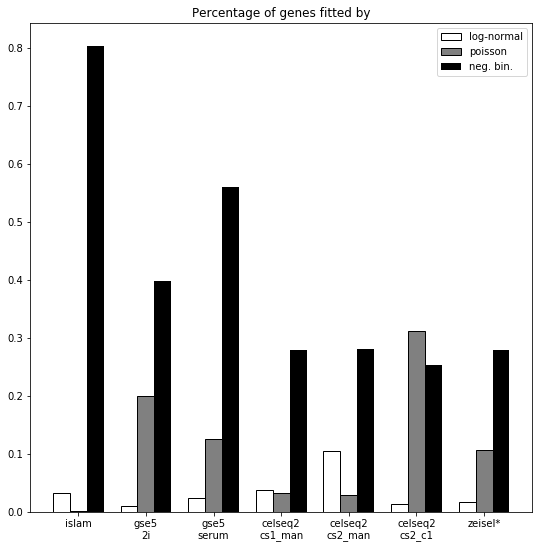

In [6]:
width=0.25

fig, ax = plt.subplots()
fig.set_size_inches(9, 9)
no = ax.bar(x, normals, width, color='white')
# due to a matplotlib bug in version 2.1 the edge color has
# to be set manually
for bar in no:
    bar.set_edgecolor("black")
    bar.set_linewidth(1)
po = ax.bar(x+width, poisson, width, color='grey')
for bar in po:
    bar.set_edgecolor("black")
    bar.set_linewidth(1)
nb = ax.bar(x+2*width, negbins, width, color='black')

ax.set_xticks(x + width)
ax.set_xticklabels((labels))
ax.set_title("Percentage of genes fitted by")
l = ax.legend((no[0], po[0], nb[0]), ("log-normal", "poisson", "neg. bin."))

asterisk (\*) denotes average over all subgroups in the dataset

read and plot fit $\alpha$

In [7]:
cs2_cs1m_a, cs2_cs1m_b = successful("celseq2", "cs1_man")
cs2_cs2c_a, cs2_cs2c_b = successful("celseq2", "cs2_c1")
cs2_cs2m_a, cs2_cs2m_b = successful("celseq2", "cs2_man")
gse5_1_a, gse5_1_b = successful("gse5", "cells2i")
gse5_2_a, gse5_2_b = successful("gse5", "serum")
islam_a, islam_b = successful("islam", "islam")

zeisel_a = []
zeisel_b = []
for z in zeisel_labels:
    a, b = successful("zeisel", z)
    zeisel_a.append(a)
    zeisel_b.append(b)

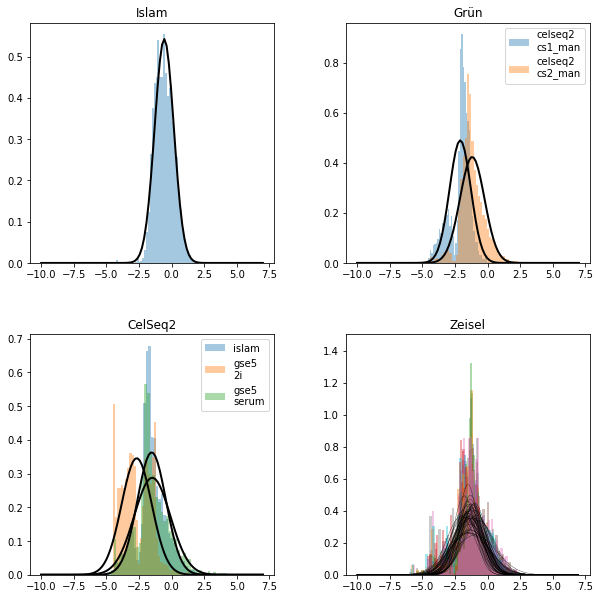

In [8]:
zeisel_amu = np.zeros(len(zeisel_labels))
zeisel_astd = np.zeros(len(zeisel_labels))

fig, ax = plt.subplots(ncols=2, nrows=2)
fig.tight_layout()
fig.set_size_inches(9, 9)
x = np.linspace(-10, 7, 100)

amu6, astd6 = hist_and_fit(islam_a, x, ax[0][0], "Islam")
# ax[0][0].set_xlim(-3, 3)
ax[0][0].set_title("Islam")

amu4, astd4 = hist_and_fit(gse5_1_a, x, ax[0][1], labels[3])
amu5, astd5 = hist_and_fit(gse5_2_a, x, ax[0][1], labels[4])
ax[0][1].set_title("Grün")
# ax[0][1].set_xlim(-5, 2)
ax[0][1].legend()

amu1, astd1 = hist_and_fit(cs2_cs1m_a, x, ax[1][0], labels[0])
amu2, astd2 = hist_and_fit(cs2_cs2c_a, x, ax[1][0], labels[1])
amu3, astd3 = hist_and_fit(cs2_cs2m_a, x, ax[1][0], labels[2])
ax[1][0].set_title("CelSeq2")
# ax[1][0].set_xlim(-5, 5)
ax[1][0].legend()

for i in range(len(zeisel_labels)):
    zeisel_amu[i], zeisel_astd[i] = hist_and_fit(zeisel_a[i], x, ax[1][1], zeisel_labels[i], lwd=0.3)
# ax[1][1].set_xlim(-4, 4)
ax[1][1].set_ylim(0, 1.5)
ax[1][1].set_title("Zeisel")

plt.show()

In [9]:
# chosen mean: 0.2
alphas = np.array([amu6, amu4, amu5, amu1, amu2, amu3])
alphas = np.exp(np.concatenate((alphas, zeisel_amu)))
np.mean(alphas)

0.2725271900254387

In [10]:
# chosen standard deviation: np.exp(0.3) = 1.35
salphas = np.array([astd6, astd4, astd5, astd1, astd2, astd3])
salphas = np.concatenate((salphas, zeisel_astd))
np.mean(salphas)

1.0730520428126442

In [11]:
print(min(alphas), max(alphas))
print(min(salphas), max(salphas))

0.06880513225361531 0.5684836302133699
0.7047175708033697 1.6034957216886627


read and plot fit $\beta$

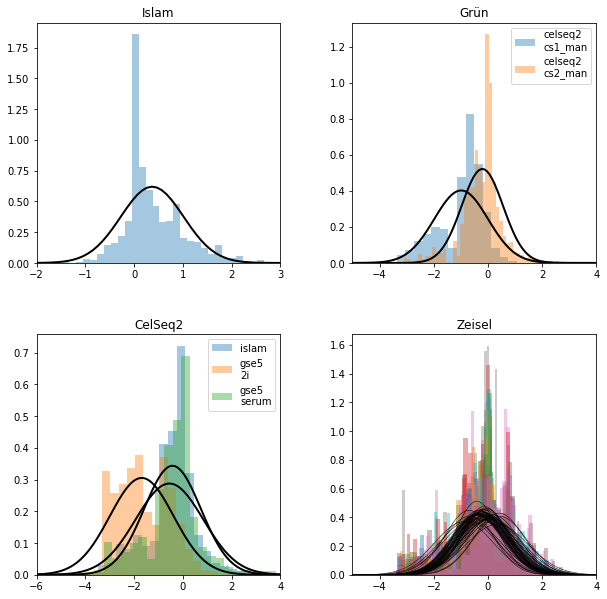

In [12]:
zeisel_bmu = np.zeros(len(zeisel_labels))
zeisel_bstd = np.zeros(len(zeisel_labels))

fig, ax = plt.subplots(ncols=2, nrows=2)
fig.tight_layout()
fig.set_size_inches(9, 9)
x = np.linspace(-7, 5, 120)

bmu6, bstd6 = hist_and_fit(islam_b, x, ax[0][0], "Islam")
ax[0][0].set_xlim(-2, 3)
ax[0][0].set_title("Islam")

bmu4, bstd4 = hist_and_fit(gse5_1_b, x, ax[0][1], labels[3])
bmu5, bstd5 = hist_and_fit(gse5_2_b, x, ax[0][1], labels[4])
ax[0][1].set_title("Grün")
ax[0][1].set_xlim(-5, 4)
ax[0][1].legend()

bmu1, bstd1 = hist_and_fit(cs2_cs1m_b, x, ax[1][0], labels[0])
bmu2, bstd2 = hist_and_fit(cs2_cs2c_b, x, ax[1][0], labels[1])
bmu3, bstd3 = hist_and_fit(cs2_cs2m_b, x, ax[1][0], labels[2])
ax[1][0].set_title("CelSeq2")
ax[1][0].set_xlim(-6, 4)
ax[1][0].legend()

for i in range(len(zeisel_labels)):
    zeisel_bmu[i], zeisel_bstd[i] = hist_and_fit(zeisel_b[i], x, ax[1][1], zeisel_labels[i], lwd=0.5)
ax[1][1].set_xlim(-5, 4)
ax[1][1].set_title("Zeisel")

plt.show()

In [13]:
# chosen mean: 2
betas = np.array([bmu6, bmu4, bmu5, bmu1, bmu2, bmu3])
betas = np.exp(np.concatenate((betas, zeisel_bmu))) + 1
np.mean(betas)

1.8375444369110727

In [14]:
# chosen mean: 2
sbetas = np.array([bstd6, bstd4, bstd5, bstd1, bstd2, bstd3])
sbetas = np.concatenate((sbetas, zeisel_bstd)) + 1
np.mean(sbetas)

1.9708130189491868

motivate scaling choices for simulation

In [15]:
celseq_1 = np.log(np.loadtxt("celseq2/cs1_man_scalings.txt"))
celseq_2 = np.log(np.loadtxt("celseq2/cs2_c1_scalings.txt"))
celseq_3 = np.log(np.loadtxt("celseq2/cs2_man_scalings.txt"))
gse5_1 = np.log(np.loadtxt("gse5/cells2i_scalings.txt"))
gse5_2 = np.log(np.loadtxt("gse5/serum_scalings.txt"))
islam = np.log(np.loadtxt("islam/islam_scalings.txt"))

zeisel = []
for i in range(len(zeisel_labels)):
    scalings = np.log(np.loadtxt("zeisel/" + zeisel_labels[i] + "_scalings.txt"))
    zeisel.append(scalings)

In [16]:
num_cells = np.zeros(6 + len(zeisel))
num_cells[0] = len(islam)
num_cells[1] = len(gse5_1)
num_cells[2] = len(gse5_2)
num_cells[3] = len(celseq_1)
num_cells[4] = len(celseq_3)
num_cells[5] = len(celseq_2)
for i, e in enumerate(zeisel_labels):
    num_cells[6 + i] = len(zeisel[i])

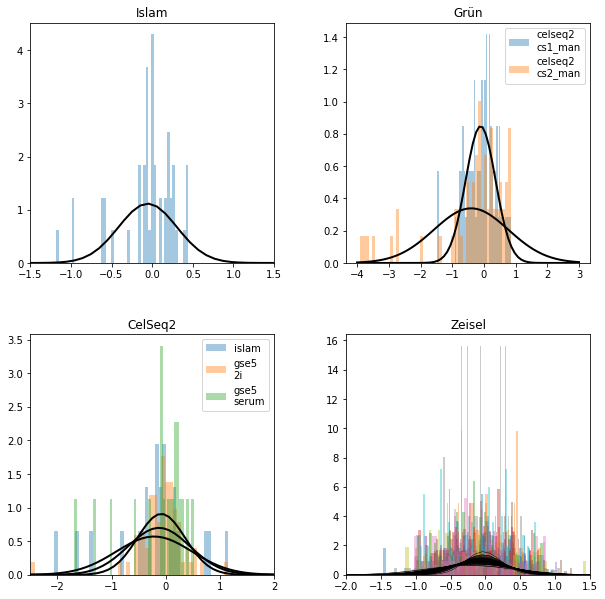

In [17]:
zeisel_smu = np.zeros(len(zeisel_labels))
zeisel_sstd = np.zeros(len(zeisel_labels))

fig, ax = plt.subplots(ncols=2, nrows=2)
fig.tight_layout()
fig.set_size_inches(9, 9)
x = np.linspace(-4, 3, 70)

smu6, sstd6 = hist_and_fit(islam, x, ax[0][0], "Islam")
ax[0][0].set_title("Islam")
ax[0][0].set_xlim(-1.5, 1.5)

smu4, sstd4 = hist_and_fit(gse5_1, x, ax[0][1], labels[3])
smu5, sstd5 = hist_and_fit(gse5_2, x, ax[0][1], labels[4])
ax[0][1].set_title("Grün")
ax[0][1].legend()

smu1, sstd1 = hist_and_fit(celseq_1, x, ax[1][0], labels[0])
smu2, sstd2 = hist_and_fit(celseq_2, x, ax[1][0], labels[1])
smu3, sstd3 = hist_and_fit(celseq_3, x, ax[1][0], labels[2])
ax[1][0].set_title("CelSeq2")
ax[1][0].set_xlim(-2.5, 2)
ax[1][0].legend()

for i in range(len(zeisel_labels)):
    zeisel_smu[i], zeisel_sstd[i] = hist_and_fit(zeisel[i], x, ax[1][1], zeisel_labels[i], lwd=0.5)
ax[1][1].set_title("Zeisel")
ax[1][1].set_xlim(-2, 1.5)

plt.show()

In [18]:
scalings = np.array([smu6, smu4, smu5, smu1, smu2, smu3])
scalings = np.concatenate((scalings, zeisel_smu))
np.mean(scalings)

-0.10156217431452456

In [19]:
scalings = np.array([sstd6, sstd4, sstd5, sstd1, sstd2, sstd3])
scalings = np.concatenate((scalings, zeisel_sstd))
np.mean(scalings)

0.44319925662125126

average expression value for each gene

In [20]:
celseq_1 = np.log(np.loadtxt("celseq2/cs1_man_genes.txt"))
celseq_2 = np.log(np.loadtxt("celseq2/cs2_c1_genes.txt"))
celseq_3 = np.log(np.loadtxt("celseq2/cs2_man_genes.txt"))
gse5_1 = np.log(np.loadtxt("gse5/cells2i_genes.txt"))
gse5_2 = np.log(np.loadtxt("gse5/serum_genes.txt"))
islam = np.log(np.loadtxt("islam/islam_genes.txt"))
zeisel_list = list()
for p in zeisel_labels:
    zeisel_list.append(np.log(np.loadtxt("zeisel/" + p + "_genes.txt")))
zeisel = np.concatenate(zeisel_list)

/home/npapado/miniconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


0.9299126274985399
1.7749355954385297


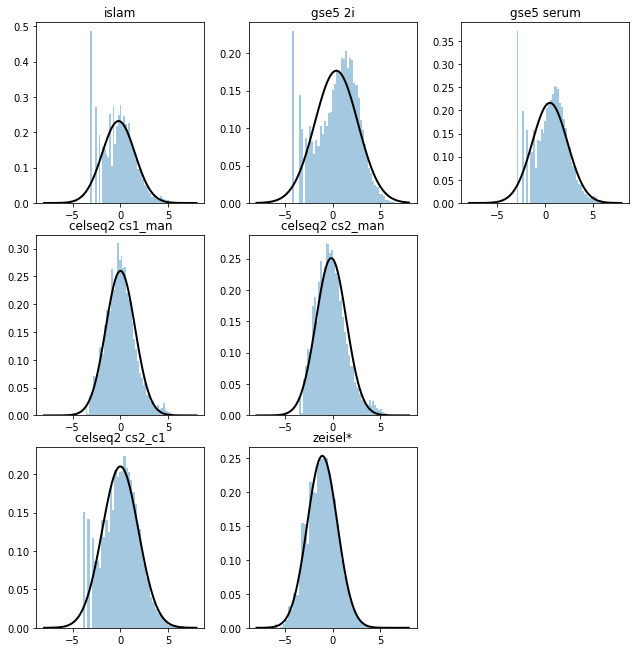

In [21]:
fig, ax = plt.subplots(ncols=3, nrows=3)
fig.set_size_inches(9, 9)
fig.tight_layout()

x = np.linspace(-8, 8, 100)
gmu1, gstd1 = hist_and_fit(celseq_1, x, ax[0][0], flat_labels[0])
gmu2, gstd2 = hist_and_fit(celseq_2, x, ax[0][1], flat_labels[1])
gmu3, gstd3 = hist_and_fit(celseq_3, x, ax[0][2], flat_labels[2])
gmu4, gstd4 = hist_and_fit(gse5_1, x, ax[1][0], flat_labels[3])
gmu5, gstd5 = hist_and_fit(gse5_2, x, ax[1][1], flat_labels[4])
ax[1][2].axis("off")
gmu6, gstd6 = hist_and_fit(islam, x, ax[2][0], flat_labels[5])
noninf = np.invert(np.isinf(zeisel))
gmu7, gstd7 = hist_and_fit(zeisel[noninf], x, ax[2][1], flat_labels[6])
ax[2][2].axis("off")

# chosen mean: 1
print(np.exp(np.mean([gmu1, gmu2, gmu3, gmu4, gmu5, gmu6, gmu7])))

# chosen standard deviation: 0.8
print(np.mean([gstd1, gstd2, gstd3, gstd4, gstd5, gstd6, gstd7]))

there seems to be a big difference between the real average expression variance and the simulated one, but if one takes into account the influence on the spread by the scaling factors, a different image forms:

we take the simulated average expression of 10.000 genes and multiply it with simulated scaling factors of 10.000 cells. This will be closer to the actual distribution of average gene expression values in simulated data before any modification of average gene expression due to differentiation (standard deviation goes from 0.8 to 1.0). Additional variance is introduced by modulation of average gene expression due to differentiation, effectively bringing the spread of average gene expression closer to the real spectrum.

In any case, it is evident that average gene expression is chosen from the center of the spectrum of real average gene expression.

In [22]:
sim_avg_genes = norm.rvs(loc=1, scale=0.8, size=10000)
sim_scales = norm.rvs(loc=0, scale=0.8, size=10000)

In [23]:
celseq_1_genes = norm(loc=gmu1, scale=gstd1)
celseq_2_genes = norm(loc=gmu2, scale=gstd2)
celseq_3_genes = norm(loc=gmu3, scale=gstd3)
gse5_1_genes = norm(loc=gmu4, scale=gstd4)
gse5_2_genes = norm(loc=gmu5, scale=gstd5)
islam_genes = norm(loc=gmu6, scale=gstd6)
zeisel_genes = norm(loc=gmu7, scale=gstd7)

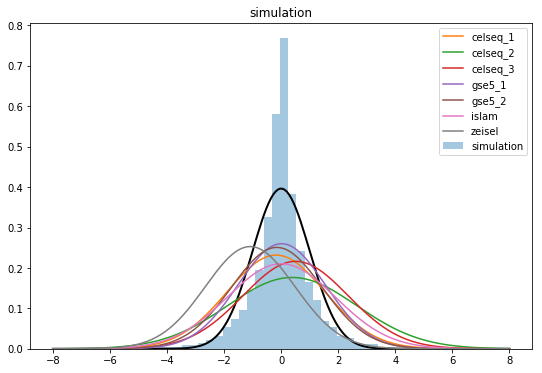

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 6)
x = np.linspace(-8, 8, 200)
simmu, simstd = hist_and_fit(sim_avg_genes * sim_scales, x, ax, "simulation")
ax.plot(x, celseq_1_genes.pdf(x), label="celseq_1")
ax.plot(x, celseq_2_genes.pdf(x), label="celseq_2")
ax.plot(x, celseq_3_genes.pdf(x), label="celseq_3")
ax.plot(x, gse5_1_genes.pdf(x), label="gse5_1")
ax.plot(x, gse5_2_genes.pdf(x), label="gse5_2")
ax.plot(x, islam_genes.pdf(x), label="islam")
ax.plot(x, zeisel_genes.pdf(x), label="zeisel")
ax.legend()

In [25]:
print(np.mean([gmu1, gmu2, gmu3, gmu4, gmu5, gmu6, gmu7]),
      np.mean([gstd1, gstd2, gstd3, gstd4, gstd5, gstd6, gstd7]))
print(simmu, simstd)

-0.07266464617461342 1.7749355954385297
-0.000852148262669693 1.0063733459000355


In [27]:
for i in range(6):
    print(flat_labels[i],
          int(num_cells[i]),
          int(total_genes[i][0]),
          int(delta_bic[i][2]),
          int(delta_bic[i][1]),
          int(delta_bic[i][0]),
          str(round(alphas[i], 3)),
          str(round(betas[i], 3)),
          str(round(scalings[i], 3)), sep="\t")

for i, e in enumerate(zeisel_labels):
    print(e,
          int(num_cells[6+i]),
          int(total_genes[6+i][0]),
          int(delta_bic[6+i][2]),
          int(delta_bic[6+i][1]),
          int(delta_bic[6+i][0]),
          str(round(np.exp(zeisel_amu[i]), 3)),
          str(round(np.exp(zeisel_bmu[i]), 3)),
          str(round(scalings[6+i], 3)), sep="\t")

islam	50	13897	468	37	11160	0.568	2.448	0.358
gse5 2i	76	11554	126	2323	4607	0.124	1.371	0.471
gse5 serum	63	11740	284	1477	6572	0.31	1.812	1.179
celseq2 cs1_man	24	12684	492	420	3545	0.217	1.575	0.7
celseq2 cs2_man	20	13567	1432	392	3826	0.069	1.185	0.44
celseq2 cs2_c1	70	14895	218	4641	3772	0.227	1.652	0.571
Astro1	68	12578	12	3763	5189	0.338	1.029	0.438
Astro2	61	12742	10	4182	4202	0.281	0.839	0.418
CA1Pyr1	380	15089	1	2876	9790	0.224	0.664	0.433
CA1Pyr2	447	15093	1	3624	8187	0.168	0.495	0.423
CA1PyrInt	49	13370	16	1683	2557	0.161	0.486	0.293
CA2Pyr2	41	13581	107	1193	2681	0.131	0.413	0.293
Choroid	10	9782	155	364	1305	0.387	1.207	0.623
ClauPyr	5	9340	1562	107	85	0.206	0.908	0.253
Epend	20	11706	70	290	2957	0.356	1.004	0.629
Int1	12	11401	639	784	1538	0.252	0.875	0.538
Int2	24	12670	279	654	2685	0.218	0.67	0.542
Int3	10	10644	663	608	1139	0.253	0.939	0.362
Int4	15	11363	257	740	1883	0.256	0.864	0.384
Int5	20	12121	424	644	2448	0.205	0.663	0.535
Int6	22	11936	265	476	3028	0.248	0.767